<a href="https://colab.research.google.com/github/Anantan08/Data_Science_Projects/blob/main/Customer_Conversion_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/KISHOREVD/Machine_learning_projects/main/Customer%20Conversion%20Prediction%20-%20Customer%20Conversion%20Prediction.csv")

In [ ]:
import warnings
warnings.filterwarnings("ignore")   #to ignore the warning

In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
df.shape   

(45211, 11)

# Data Cleaning 


HANDLING MISSING VALUES 

In [ ]:
df.isnull().sum()  # so no null values

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

CHECKING DATATYPE 

In [ ]:
df.dtypes  # all datatypes are correct

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

COLUMN NAMES CHANGING

In [ ]:
df=df.rename(columns={"mon":"month","dur":"duration"})

NUMERICAL COLUMNS OUTLIER DETECTION 

In [ ]:
df.describe()

,age,day,duration,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


Outliers

In [ ]:
#age column
print(df[df["age"]>70].shape)
print(df[df["age"]>75].shape)
print(df[df["age"]>80].shape)
print(df[df["age"]>90].shape)

(487, 11)
(261, 11)
(99, 11)
(7, 11)


In [ ]:
#age column outlier removal
q1,q3=np.percentile(df["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("upper age bound:",upper,"lower age bound :", lower)
age=[]
for i in df["age"]:
  if lower<=i<=upper:
    age.append(i)
print(len(age))
print(df.shape)

upper age bound: 70.5 lower age bound : 10.5
44724
(45211, 11)


In [ ]:
# Numerical column cleaning
#duration column outlier removal
q1,q3=np.percentile(df["duration"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("upper call duration:",upper,"lower call duration:", lower)
dur=[]
for i in df["duration"]:
  if lower<=i<=upper:
    dur.append(i)
print(len(dur))

upper call duration: 643.0 lower call duration: -221.0
41976


In [ ]:
#num_calls outlier detection
q1,q3=np.percentile(df["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("upper num_calls:",upper,"lower num_calls", lower)
num_calls=[]
for i in df["num_calls"]:
  if lower<=i<=upper:
    num_calls.append(i)
print(len(num_calls))

upper num_calls: 6.0 lower num_calls -2.0
42147


In [ ]:
df_out_drop=df[(df["age"].isin(age)) & (df["duration"].isin(dur)) & (df["num_calls"].isin(num_calls))]

In [ ]:
df_out_drop.shape

(38667, 11)

# EXPLORATORY DATA ANALYSIS

<AxesSubplot:>

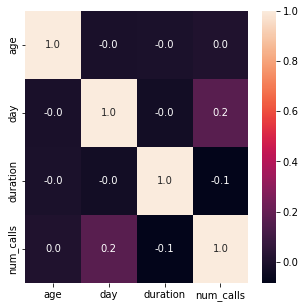

In [ ]:
#lets check whether linear relationship exists between numeric fetures and target using pearson correlation coeff
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True, fmt='.1f')



Plotting Features column vs Target column Here we plot two type of data:

* Numerical Columns
* Categorical Columns




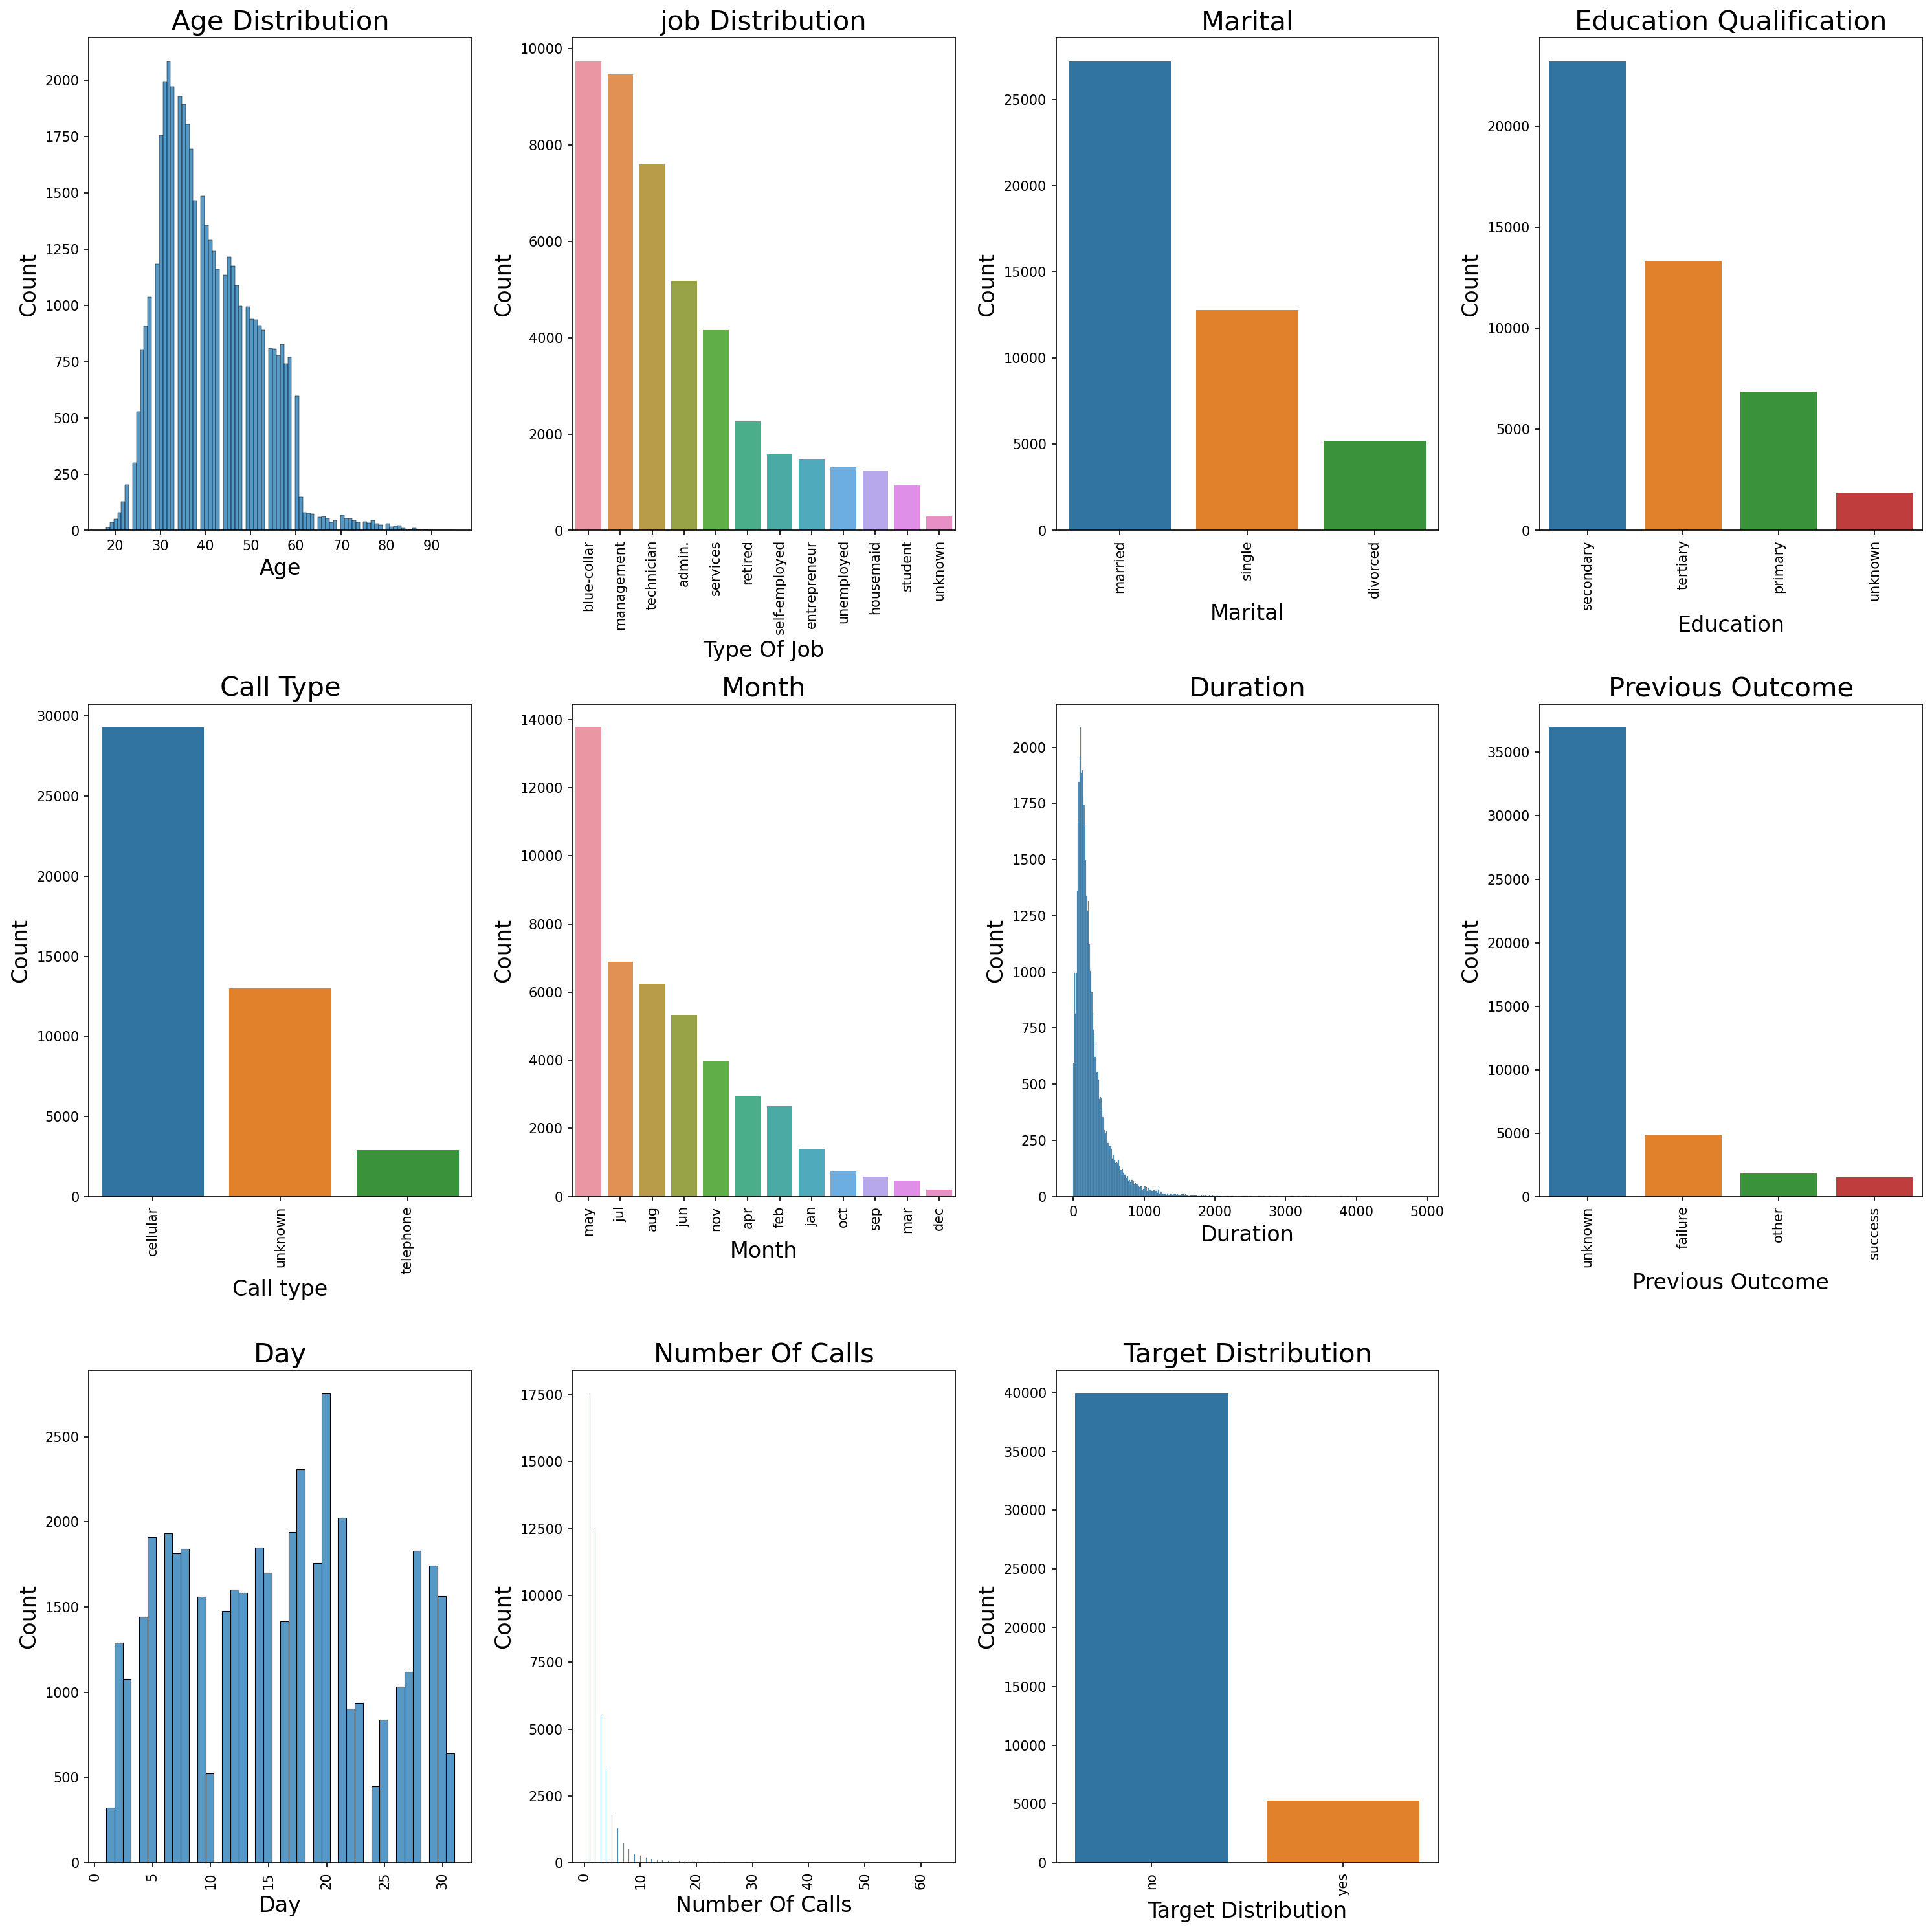

In [ ]:
# Age distribution 
plt.figure(figsize = (20,20),dpi=150)  
plt.subplot(3,4,1) 
sns.histplot(df.age) 
plt.title('Age Distribution', fontsize = 20) 
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16)  
#Job distribution 
plt.subplot(3,4,2) 
sns.countplot(df['job'],order=df.job.value_counts().index) 
plt.title('job Distribution', fontsize = 20) 
plt.xlabel('Type Of Job',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
# Marital distribution 
plt.subplot(3,4,3) 
sns.countplot(df['marital'],order=df.marital.value_counts().index) 
plt.title('Marital', fontsize = 20) 
plt.xlabel('Marital',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
# Education qualification distribution 
plt.subplot(3,4,4) 
sns.countplot(df['education_qual'],order=df.education_qual.value_counts().index) 
plt.title('Education Qualification', fontsize = 20) 
plt.xlabel('Education',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16) 
 # Call type distribution 
plt.subplot(3,4,5) 
sns.countplot(df['call_type'],order=df.call_type.value_counts().index) 
plt.title('Call Type', fontsize = 20) 
plt.xlabel('Call type',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
 # Mon distribution 
plt.subplot(3,4,6) 
sns.countplot(df['month'],order=df.month.value_counts().index) 
plt.title('Month', fontsize = 20) 
plt.xlabel('Month',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
 # Dur distribution 
plt.subplot(3,4,7) 
sns.histplot(df.duration) 
plt.title('Duration', fontsize = 20) 
plt.xlabel('Duration',fontsize = 16) 
plt.ylabel('Count',fontsize = 16)  
 # Previous outcome  distribution  
plt.subplot(3,4,8) 
sns.countplot(df['prev_outcome'],order=df.prev_outcome.value_counts().index) 
plt.title('Previous Outcome', fontsize = 20) 
plt.xlabel('Previous Outcome',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
# Day distribution 
plt.subplot(3,4,9) 
sns.histplot(df['day']) 
plt.title('Day', fontsize = 20) 
plt.xlabel('Day',fontsize = 16) 
plt.xticks(rotation = 90,fontsize = 10) 
plt.ylabel('Count',fontsize = 16)  
# Num call distribution 
plt.subplot(3,4,10) 
sns.histplot(df['num_calls']) 
plt.title('Number Of Calls', fontsize = 20) 
plt.xlabel('Number Of Calls',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  

 # Target distribution 
plt.subplot(3,4,11) 
sns.countplot(df['y']) 
plt.title('Target Distribution', fontsize = 20) 
plt.xlabel('Target Distribution',fontsize = 16)
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  

plt.tight_layout()


plt.show()

INTERPRETATION:
1. AGE 
  * Company targets 30 to 40 ages people to sell their insurance plan
  * People aged less than 25 years and more than 60 years are less targeted by the company for insurance 

2. JOB
  * Blue collar and management people are targeted most by insurance company
  * Students are least targeted for insurance plan

3. MARITAL STATUS
  * Married people are targeted the most and divorced people are least targeted 

4. EDUCATIONAL QUALIFICATION
  * Secondary qualified people have been targeted thye most for insurance followed by tertiary and primary

5. CALL_TYPE
  * Cellur mode is most used for contacting the people for campaign

6. Month
  * May month is when maxmium calls are generated for new insurance customers,december is the least no of calls placed by the company

7. Duration 
  * maximum number of calls lasted less than 1000 seconds

8. Previous Outcome
  * More unknown as status than failure and success

9. Day
  * Most number of calls are between in the mid of month

10. Number of Calls
  * Most People are contacted only 1 or 2 times by the company

11. Target
  * No of people subscribed is very less compared to Unsubcribed people

Plotting of Numerical data vs Target

Here we are plotting all our Numerical columns with target to figure out, is there any relation between numerical features column. Here we plot 2 type of numerical data:

* Continous variable
* discrete variable


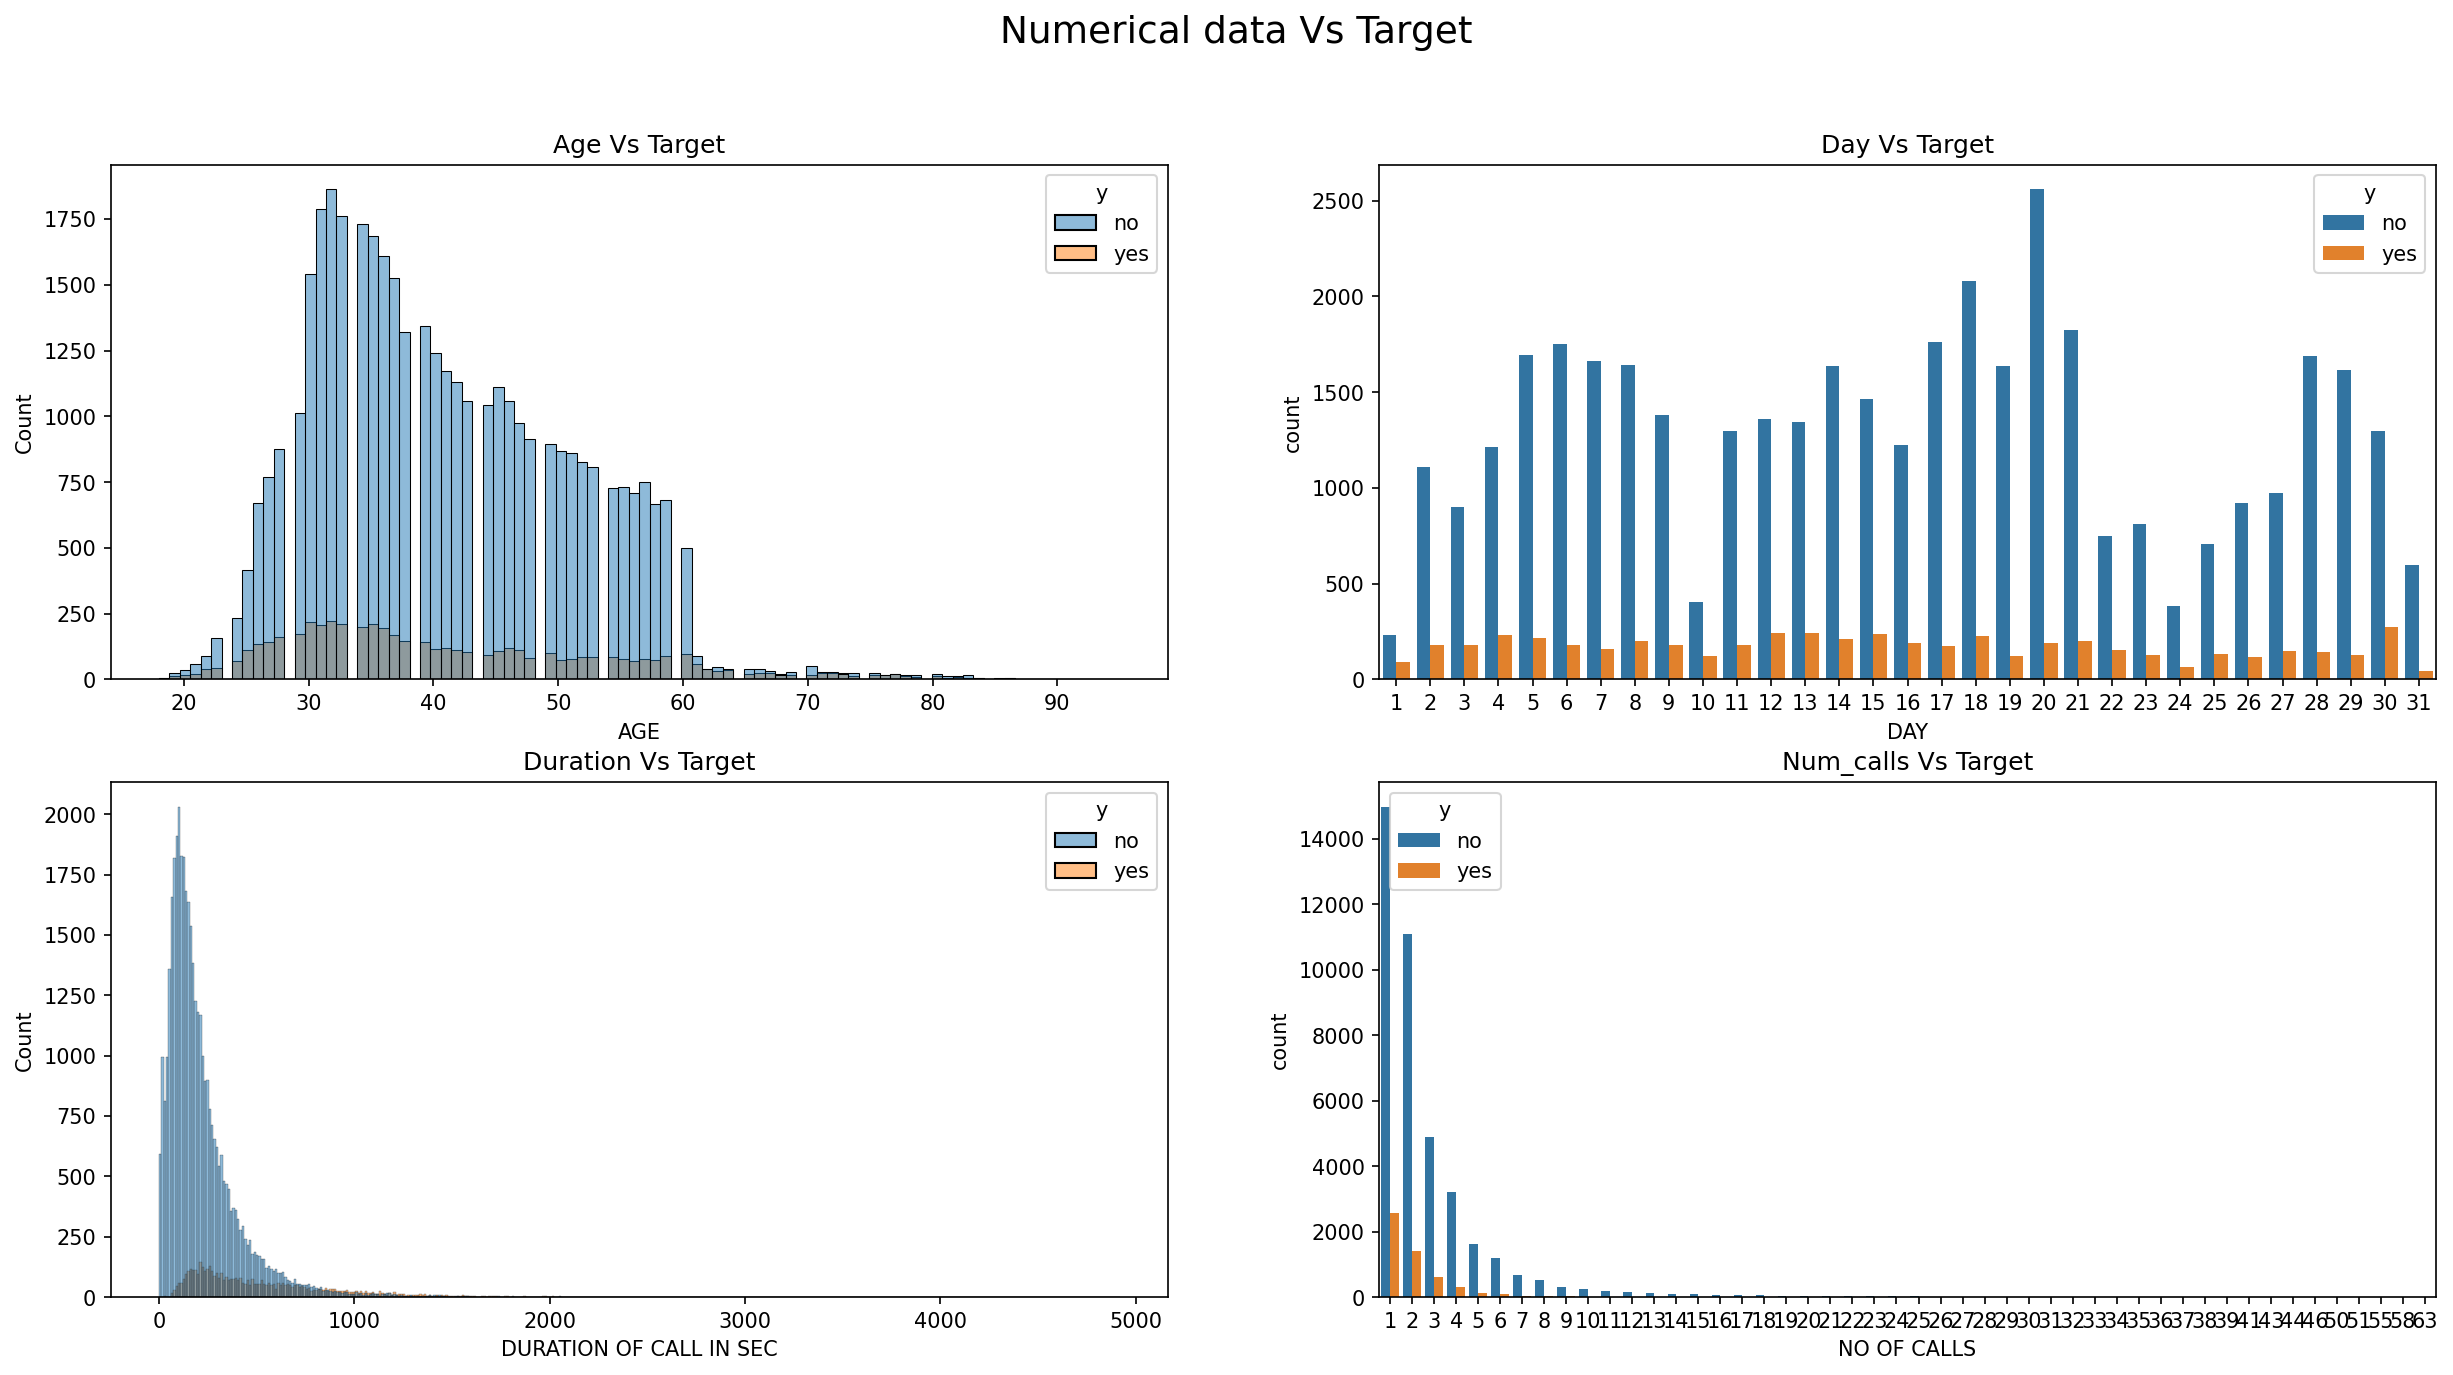

In [ ]:
plt.figure(figsize=(20, 10), dpi=150)
#regplot--->plot data and a linear regression model fit.
plt.subplot(2,2,1)
sns.histplot(x='age',hue='y',data=df)
plt.title("Age Vs Target",)
plt.xlabel("AGE")


plt.subplot(2,2,2)
sns.countplot(x='day',hue='y',data=df)
plt.title("Day Vs Target")
plt.xlabel("DAY")

plt.subplot(2,2,3)
sns.histplot(x='duration',hue='y',data=df)
plt.title("Duration Vs Target")
plt.xlabel("DURATION OF CALL IN SEC")

plt.subplot(2,2,4)
sns.countplot(x='num_calls',hue='y',data=df)
plt.title("Num_calls Vs Target")
plt.xlabel("NO OF CALLS")

plt.suptitle("Numerical data Vs Target", fontsize=18)  #suptitle to show title for overall plot 
plt.show()

INTERPRETATION:

1. AGE VS TARGET

* 

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'month',
       'duration', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')



Categorical Columns

Plotting of Categorical data vs Target



From the above plot 
* we can see Blue collar JOb type person have been contacted the most and 

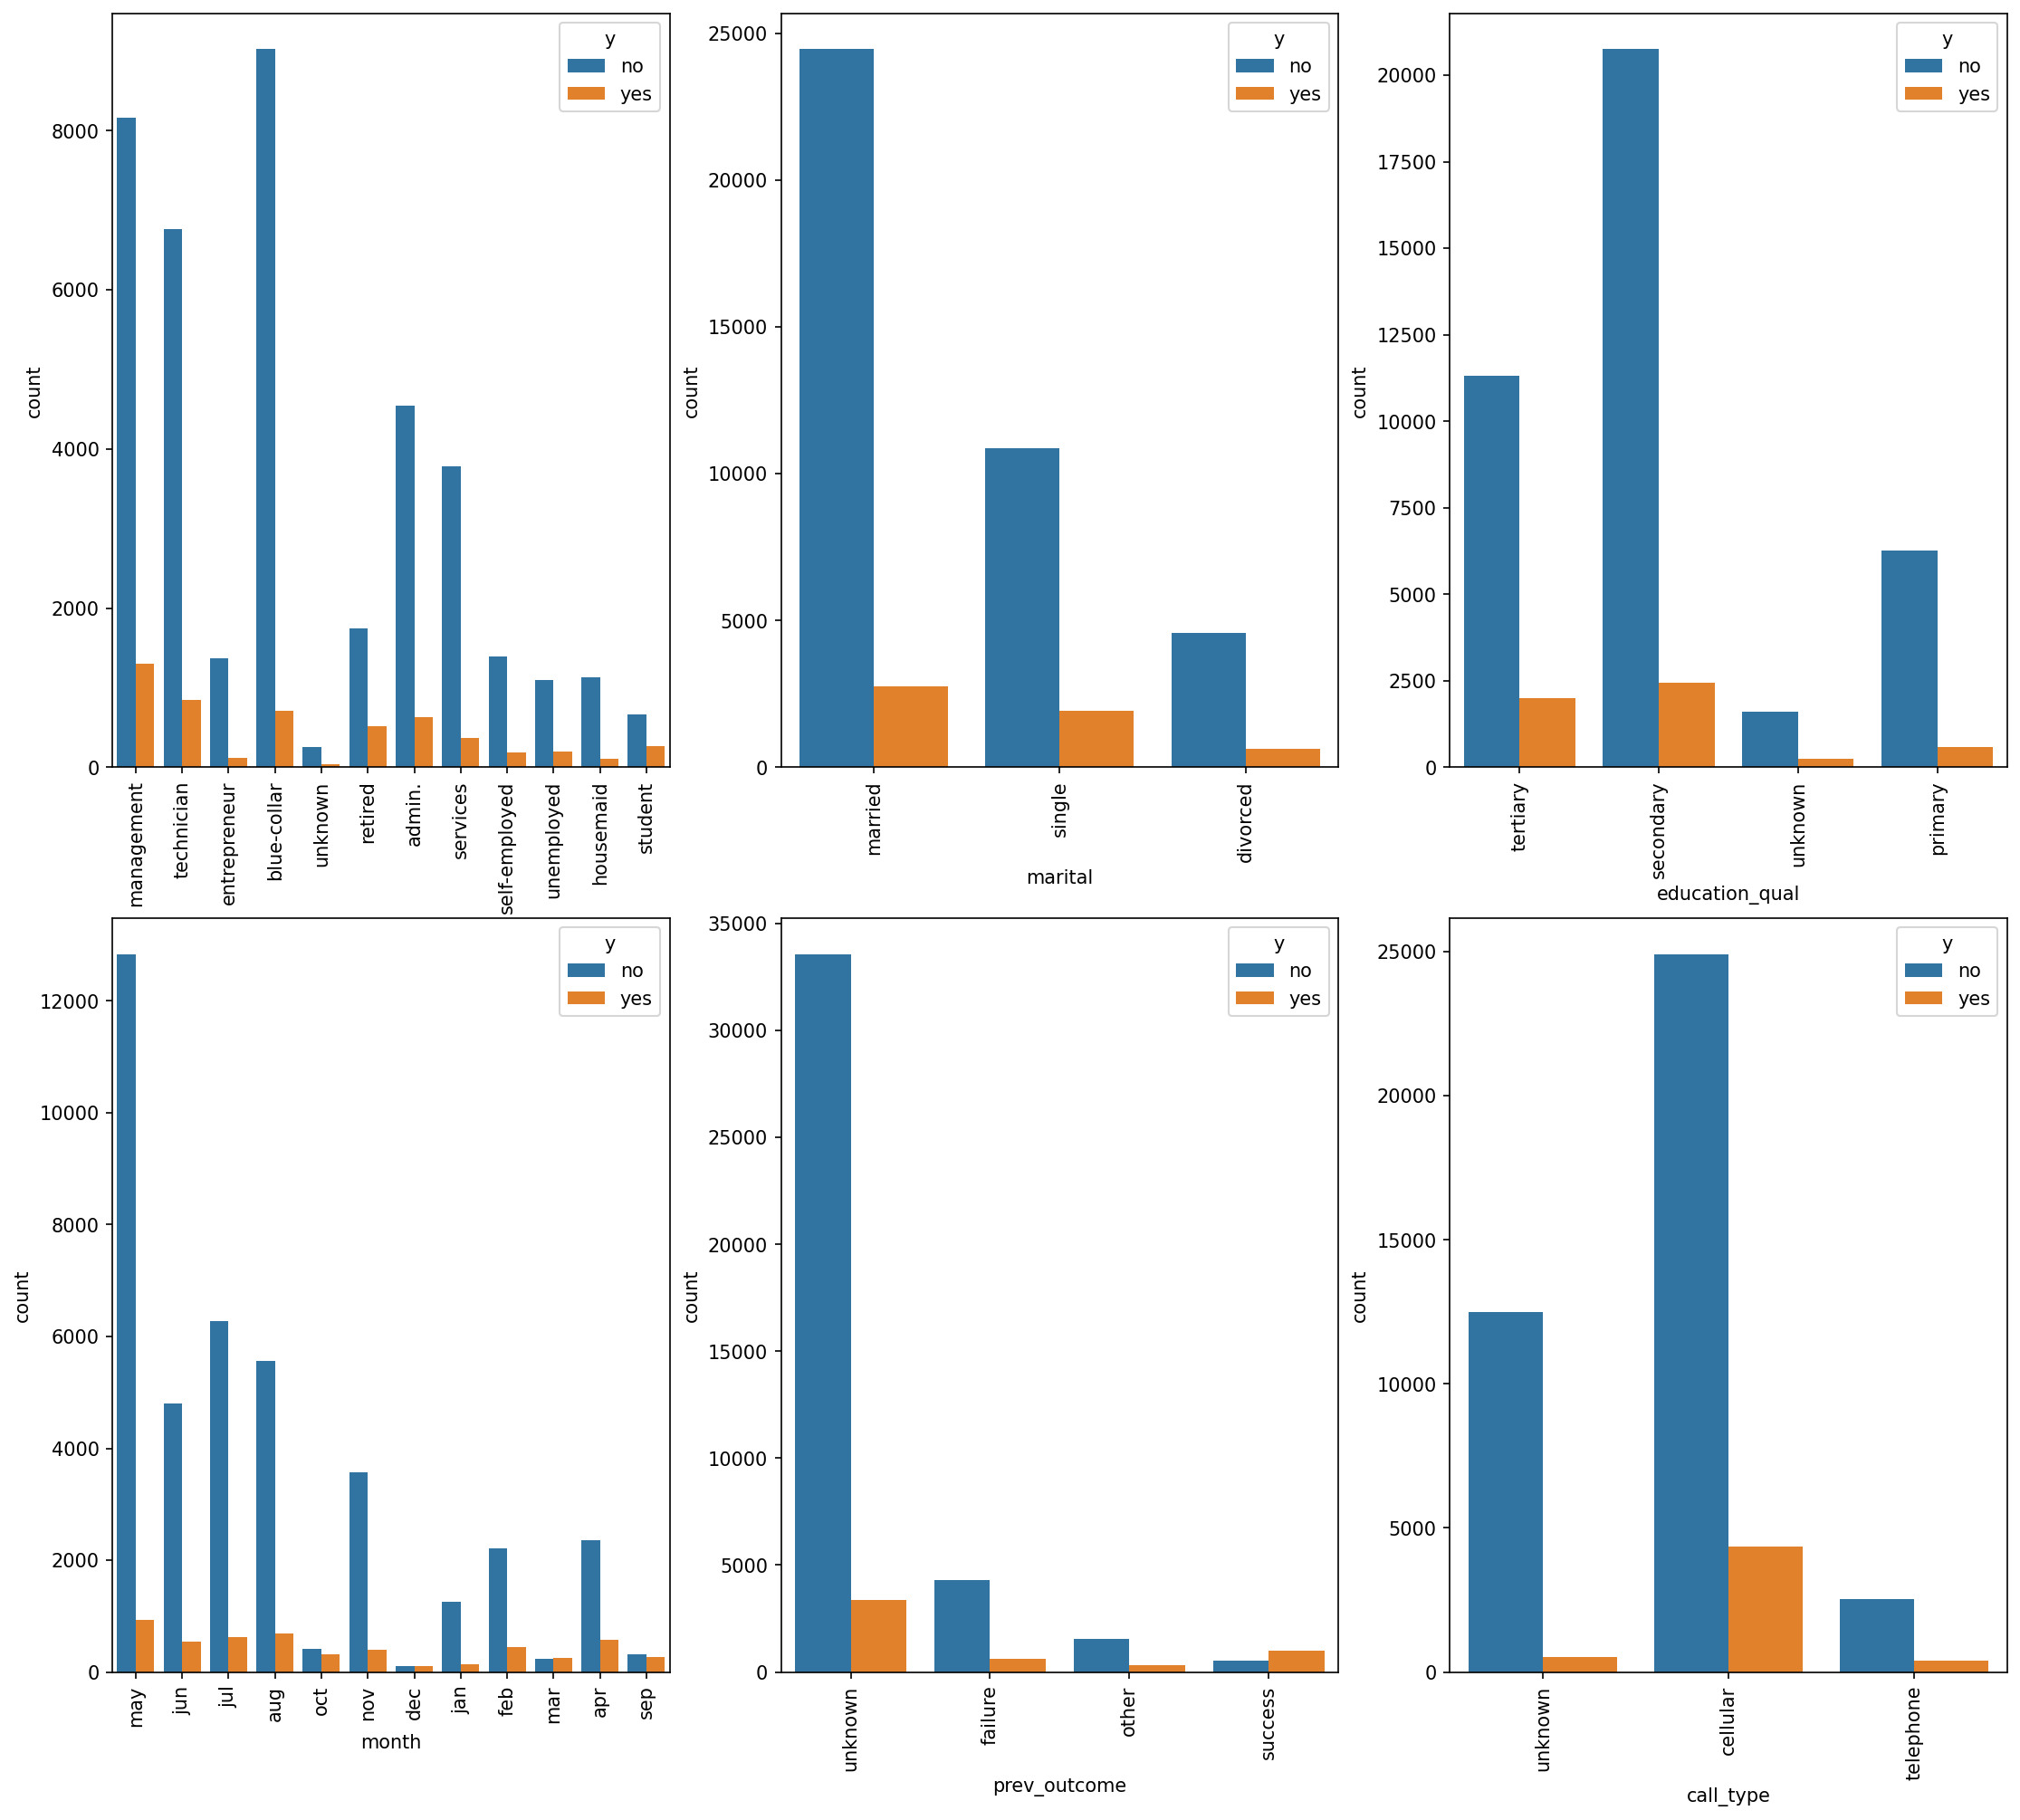

In [ ]:

plt.figure(figsize=(18,25), dpi=150)

plt.subplot(3,3,1)
sns.countplot(x='job',hue='y',data=df)
plt.xticks(rotation=90)

plt.subplot(3,3,2)
sns.countplot(x='marital',hue='y',data=df)
plt.xticks(rotation=90)

plt.subplot(3,3,3)
sns.countplot(x='education_qual',hue='y',data=df)
plt.xticks(rotation=90)


plt.subplot(3,3,4)
sns.countplot(x='month',hue='y',data=df)
plt.xticks(rotation=90)

plt.subplot(3,3,5)
sns.countplot(x='prev_outcome',hue='y',data=df)
plt.xticks(rotation=90)


plt.subplot(3,3,6)
sns.countplot(x='call_type',hue='y',data=df)
plt.xticks(rotation=90)

plt.show()

Interpretation:
1. 

# Data Encoding

In [ ]:
n_df = df.copy()

In [ ]:
n_df = pd.get_dummies(n_df,columns=['job'],drop_first=True)

In [ ]:
n_df['marital'] = n_df['marital'].map({'married':0,'single':1,'divorced':2})

In [ ]:
n_df['education_qual'] = n_df['education_qual'].map({'secondary':0,'primary':2,'tertiary':1,'unknown':3})

In [ ]:
n_df['call_type']= n_df['call_type'].map({'cellular':0,'unknown':1,'telephone':2})

In [ ]:
n_df = pd.get_dummies(n_df,columns=['month'],drop_first=True)

In [ ]:
n_df = pd.get_dummies(n_df,columns=['prev_outcome'],drop_first=True)

In [ ]:
n_df['y'] = n_df['y'].map({'no':0,'yes':1})

In [ ]:
n_df.head()

,age,marital,education_qual,call_type,day,duration,num_calls,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,0,1,1,5,261,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,1,0,1,5,151,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,0,1,5,76,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,0,3,1,5,92,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,3,1,5,198,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
X = n_df.drop('y',axis = 1)
y = n_df['y']

**Splitting The data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# Balance The Data And Model Building

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='all')
X_train, y_train = smt.fit_resample(X_train, y_train)

# Data Scaling

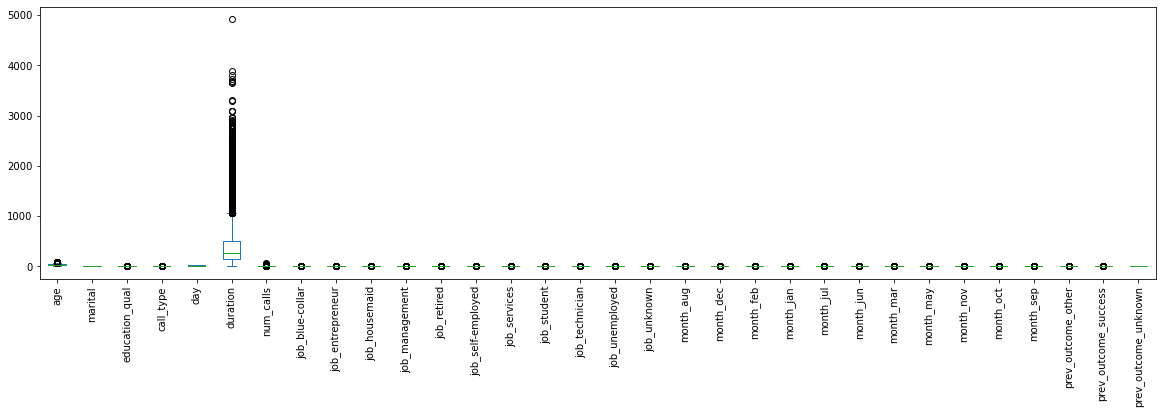

In [ ]:
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)
plt.show()  #lets scale  the datasets

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
log_reg_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for logistic regression  :  ",round(log_reg_auroc,2))

auroc score for logistic regression  :   0.69


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

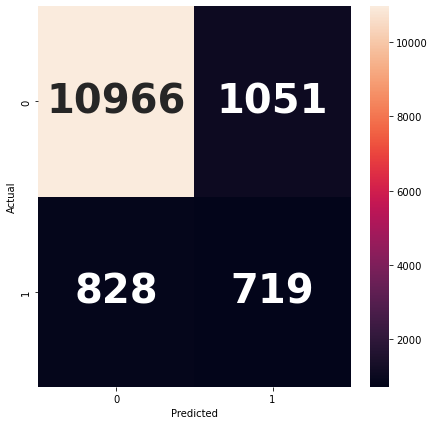

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d') 

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#doing cross validation to identify best value of K 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
for i in [1,2,3,4,5,6,7,8,9,10,20]:  #for each k value finding the auroc 
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  trainAccuracy = roc_auc_score(y_train, knn.predict(X_train))
  print("K value  : " , i,"Train accuracy :",trainAccuracy, " cross val score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  :  1 Train accuracy : 1.0  cross val score :  0.9120511619396687
K value  :  2 Train accuracy : 0.9616976474005228  cross val score :  0.911924466242801
K value  :  3 Train accuracy : 0.9545091489979669  cross val score :  0.9153005025248842
K value  :  4 Train accuracy : 0.9456505954109788  cross val score :  0.9146289863302843
K value  :  5 Train accuracy : 0.9430547487656115  cross val score :  0.9147558962405613
K value  :  6 Train accuracy : 0.9384439442346791  cross val score :  0.913975447584088
K value  :  7 Train accuracy : 0.9368101945977345  cross val score :  0.9138845485956629
K value  :  8 Train accuracy : 0.9339783618936973  cross val score :  0.9135033937336055
K value  :  9 Train accuracy : 0.9329255010165554  cross val score :  0.9138300988426806
K value  :  10 Train accuracy : 0.9313099041533547  cross val score :  0.9121419521735937
K value  :  20 Train accuracy : 0.9219067673540517  cross val score :  0.9094371948035651


In [ ]:
# at k=10 we get good cross val score 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)  #initialized 
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
roc_auc_score(y_test,y_pred)

0.6588298015002341

In [ ]:
from sklearn.metrics import roc_auc_score
KNN_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for KNN  :  ",round(KNN_auroc,2))

auroc score for KNN  :   0.66


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

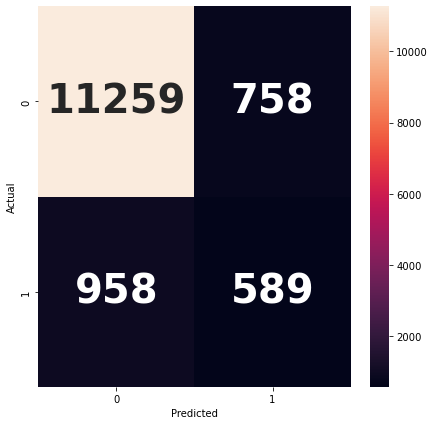

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = roc_auc_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7213186174847518  Cross val score :  0.7213186404026526
Depth  :  2  Training Accuracy :  0.7661741214057508  Cross val score :  0.7587138653287095
Depth  :  3  Training Accuracy :  0.7968341562590764  Cross val score :  0.7970157666341985
Depth  :  4  Training Accuracy :  0.8349549811211152  Cross val score :  0.8319785884140469
Depth  :  5  Training Accuracy :  0.8457377287249492  Cross val score :  0.8419626601640704
Depth  :  6  Training Accuracy :  0.8620389195469066  Cross val score :  0.8560309247704918
Depth  :  7  Training Accuracy :  0.8844575951205343  Cross val score :  0.8749825135946422
Depth  :  8  Training Accuracy :  0.8983444670345628  Cross val score :  0.8866367051314855
Depth  :  9  Training Accuracy :  0.9125943944234679  Cross val score :  0.8973467988541362
Depth  :  10  Training Accuracy :  0.9255736276503049  Cross val score :  0.9046442686444429


In [ ]:
#lets us fit the model with max_depth =5 it seems more of genralised model   in depth>5 we see overfitted model 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=9)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
dt_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for decision tree  :  ",round(dt_auroc,3))

auroc score for decision tree  :   0.778


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

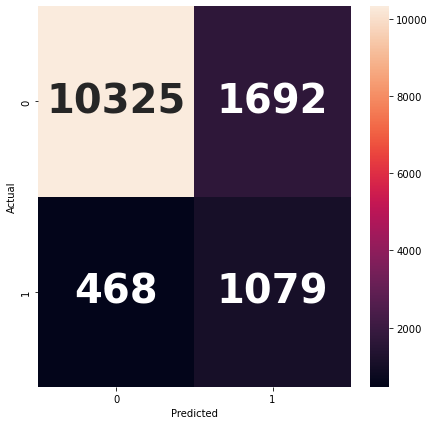

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

In [ ]:
y_pred= rf.predict(X_test)

In [ ]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(X_train, y_train) # the model is trained
  trainAccuracy = roc_auc_score(y_train, rf.predict(X_train)) # this is useless information - i am showing to prove a point
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.8298177461516119  Cross val score :  0.8211049971308585
Depth  :  2  Training Accuracy :  0.8445396456578564  Cross val score :  0.8361719015810005
Depth  :  3  Training Accuracy :  0.8614943363345919  Cross val score :  0.8547966205165298
Depth  :  4  Training Accuracy :  0.870334737147836  Cross val score :  0.8647262886518436
Depth  :  5  Training Accuracy :  0.879628957304676  Cross val score :  0.8759629354118228
Depth  :  6  Training Accuracy :  0.8872168167295963  Cross val score :  0.8822438702997788
Depth  :  7  Training Accuracy :  0.9021928550682544  Cross val score :  0.8919919283069244
Depth  :  8  Training Accuracy :  0.9092724368283474  Cross val score :  0.8991986045677154
Depth  :  9  Training Accuracy :  0.9212895730467614  Cross val score :  0.9049893104213307
Depth  :  10  Training Accuracy :  0.9288048213767064  Cross val score :  0.9100720969831766


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=8,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8)

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
rf_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for random forest classifier   :  ",round(rf_auroc,2))

auroc score for random forest classifier   :   0.77


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

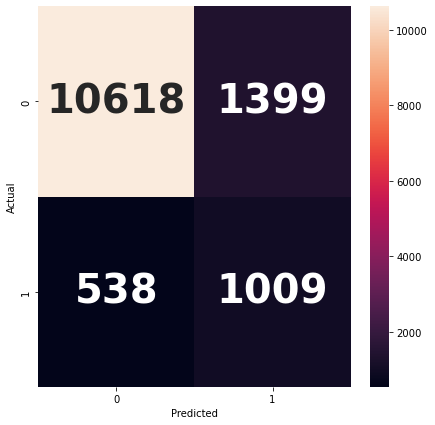

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

In [ ]:
input_cols=df.columns.to_list()[0:10]

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(input_cols, importances)]  #input_cols=column names as list

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: day                  Importance: 0.33
Variable: education_qual       Importance: 0.08
Variable: duration             Importance: 0.06
Variable: age                  Importance: 0.02
Variable: month                Importance: 0.02
Variable: job                  Importance: 0.01
Variable: marital              Importance: 0.01
Variable: call_type            Importance: 0.01
Variable: num_calls            Importance: 0.0
Variable: prev_outcome         Importance: 0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=8,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8)

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
rf_auroc1=roc_auc_score(y_test,y_pred)
print("auroc score for random forest classifier   :  ",round(rf_auroc1,2))

auroc score for random forest classifier   :   0.76


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

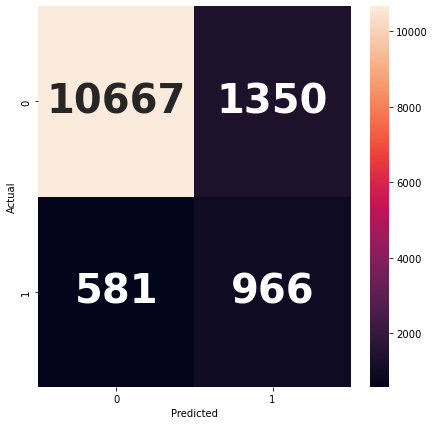

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# XG Boost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.15,0.2,0.5,0.7,1]:  #cross validation for learning rate 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train)
  print("Learning rate : ", lr," Train score : ", roc_auc_score(y_train, model.predict(X_train))," Cross-Val score : ", np.mean(cross_val_score(model,X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.8948409817020041  Cross-Val score :  0.888451916603622
Learning rate :  0.02  Train score :  0.9098896311356375  Cross-Val score :  0.9009047978926146
Learning rate :  0.03  Train score :  0.9243755445832122  Cross-Val score :  0.9124681102145786
Learning rate :  0.04  Train score :  0.929385710136509  Cross-Val score :  0.9167159588198779
Learning rate :  0.05  Train score :  0.9340691257624165  Cross-Val score :  0.9179140906680334
Learning rate :  0.1  Train score :  0.9427098460644786  Cross-Val score :  0.9206008244513864
Learning rate :  0.11  Train score :  0.9439805402265465  Cross-Val score :  0.9214539969124267
Learning rate :  0.12  Train score :  0.9445977345338367  Cross-Val score :  0.9218352341642572
Learning rate :  0.15  Train score :  0.9485550392099913  Cross-Val score :  0.9223435724706371
Learning rate :  0.2  Train score :  0.9524397327911704  Cross-Val score :  0.9242496137237897
Learning rate :  0.5  Train score :  0.97039

In [ ]:
model = xgb.XGBClassifier(learning_rate =0.08, n_estimators=100)  #at lr=0.08 model is more generalized
model.fit(X_train,y_train) #train the model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
xg_auroc=roc_auc_score(y_test,y_pred)  #handles predicted probaility 
print("auroc score for xg boost   :  ",round(xg_auroc,2))  #we get 0.99 very good auroc score

auroc score for xg boost   :   0.78


In [ ]:
from sklearn.metrics import  confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

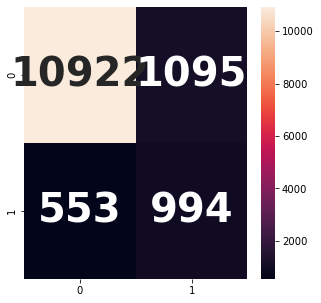

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

In [ ]:
bin_class=pd.DataFrame({"Model":["Logistic regression","KNN","Decision Tree","Random Forest","XGboost"],
                       "auroc":[log_reg_auroc,KNN_auroc,dt_auroc,rf_auroc,xg_auroc]})

In [ ]:
print("Models and their evaluations")
print("\n")
bin_class.sort_values(["auroc"],ascending=False)

Models and their evaluations




,Model,auroc
2,Decision Tree,0.778339
4,XGboost,0.775707
3,Random Forest,0.767906
0,Logistic regression,0.688656
1,KNN,0.658830


# Model Building Without Outliers

In [ ]:
df2=n_df[(n_df["age"].isin(age)) & (n_df["duration"].isin(dur)) & (n_df["num_calls"].isin(num_calls))]

In [ ]:
X = df2.drop('y',axis = 1)
y = df2['y']

**Spliting The Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# Balance The Data And Model Building For Without Outliers

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='all')
X_train, y_train = smt.fit_resample(X_train, y_train)

# Data Scaling

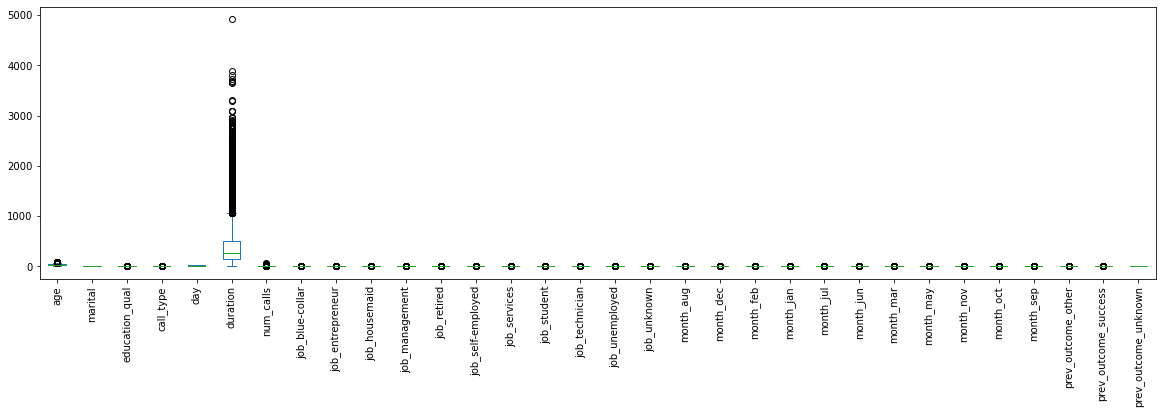

In [ ]:
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)
plt.show()  #lets scale  the datasets

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
log_reg_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for logistic regression  :  ",round(log_reg_auroc,2))

auroc score for logistic regression  :   0.69


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

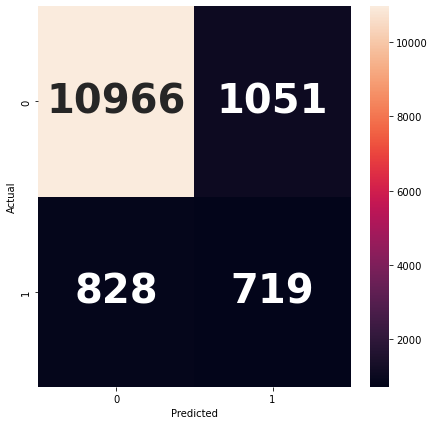

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d') 

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#doing cross validation to identify best value of K 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
for i in [1,2,3,4,5,6,7,8,9,10,20]:  #for each k value finding the auroc 
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  trainAccuracy = roc_auc_score(y_train, knn.predict(X_train))
  print("K value  : " , i,"Train accuracy :",trainAccuracy, " cross val score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  :  1 Train accuracy : 1.0  cross val score :  0.9120511619396687
K value  :  2 Train accuracy : 0.9616976474005228  cross val score :  0.911924466242801
K value  :  3 Train accuracy : 0.9545091489979669  cross val score :  0.9153005025248842
K value  :  4 Train accuracy : 0.9456505954109788  cross val score :  0.9146289863302843
K value  :  5 Train accuracy : 0.9430547487656115  cross val score :  0.9147558962405613
K value  :  6 Train accuracy : 0.9384439442346791  cross val score :  0.913975447584088
K value  :  7 Train accuracy : 0.9368101945977345  cross val score :  0.9138845485956629
K value  :  8 Train accuracy : 0.9339783618936973  cross val score :  0.9135033937336055
K value  :  9 Train accuracy : 0.9329255010165554  cross val score :  0.9138300988426806
K value  :  10 Train accuracy : 0.9313099041533547  cross val score :  0.9121419521735937
K value  :  20 Train accuracy : 0.9219067673540517  cross val score :  0.9094371948035651


In [ ]:
# at k=10 we get good cross val score 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)  #initialized 
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
roc_auc_score(y_test,y_pred)

0.6588298015002341

In [ ]:
from sklearn.metrics import roc_auc_score
KNN_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for KNN  :  ",round(KNN_auroc,2))

auroc score for KNN  :   0.66


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

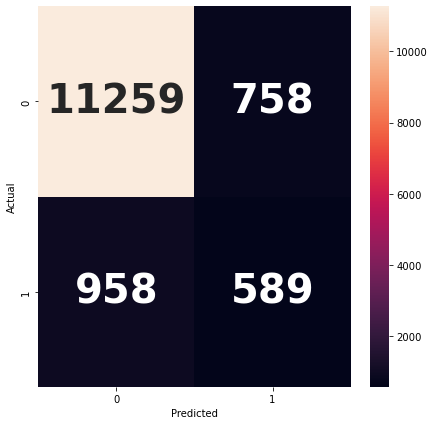

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = roc_auc_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7213186174847518  Cross val score :  0.7213186404026526
Depth  :  2  Training Accuracy :  0.7661741214057508  Cross val score :  0.7587138653287095
Depth  :  3  Training Accuracy :  0.7968341562590764  Cross val score :  0.7970157666341985
Depth  :  4  Training Accuracy :  0.8349549811211152  Cross val score :  0.8319785884140469
Depth  :  5  Training Accuracy :  0.8457377287249492  Cross val score :  0.8419626601640704
Depth  :  6  Training Accuracy :  0.8620389195469066  Cross val score :  0.8560309247704918
Depth  :  7  Training Accuracy :  0.8844575951205343  Cross val score :  0.8749825135946422
Depth  :  8  Training Accuracy :  0.8983444670345628  Cross val score :  0.8866367051314855
Depth  :  9  Training Accuracy :  0.9125943944234679  Cross val score :  0.8973467988541362
Depth  :  10  Training Accuracy :  0.9255736276503049  Cross val score :  0.9046442686444429


In [ ]:
#lets us fit the model with max_depth =5 it seems more of genralised model   in depth>5 we see overfitted model 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=9)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
dt_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for decision tree  :  ",round(dt_auroc,3))

auroc score for decision tree  :   0.778


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

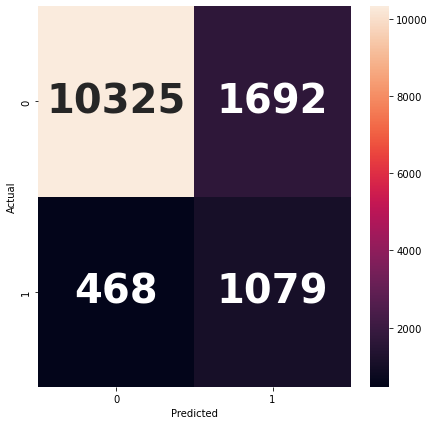

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

In [ ]:
y_pred= rf.predict(X_test)

In [ ]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(X_train, y_train) # the model is trained
  trainAccuracy = roc_auc_score(y_train, rf.predict(X_train)) # this is useless information - i am showing to prove a point
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.8298177461516119  Cross val score :  0.8211049971308585
Depth  :  2  Training Accuracy :  0.8445396456578564  Cross val score :  0.8361719015810005
Depth  :  3  Training Accuracy :  0.8614943363345919  Cross val score :  0.8547966205165298
Depth  :  4  Training Accuracy :  0.870334737147836  Cross val score :  0.8647262886518436
Depth  :  5  Training Accuracy :  0.879628957304676  Cross val score :  0.8759629354118228
Depth  :  6  Training Accuracy :  0.8872168167295963  Cross val score :  0.8822438702997788
Depth  :  7  Training Accuracy :  0.9021928550682544  Cross val score :  0.8919919283069244
Depth  :  8  Training Accuracy :  0.9092724368283474  Cross val score :  0.8991986045677154
Depth  :  9  Training Accuracy :  0.9212895730467614  Cross val score :  0.9049893104213307
Depth  :  10  Training Accuracy :  0.9288048213767064  Cross val score :  0.9100720969831766


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=8,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8)

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
rf_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for random forest classifier   :  ",round(rf_auroc,2))

auroc score for random forest classifier   :   0.77


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

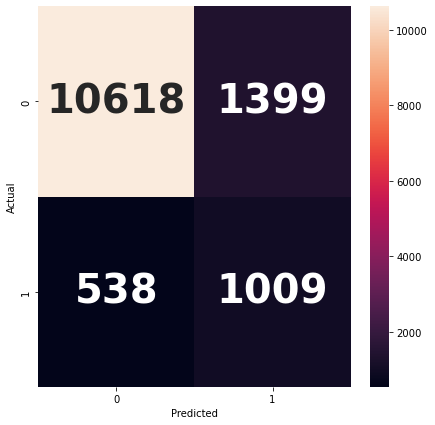

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

In [ ]:
input_cols=df.columns.to_list()[0:10]

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(input_cols, importances)]  #input_cols=column names as list

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: day                  Importance: 0.33
Variable: education_qual       Importance: 0.08
Variable: duration             Importance: 0.06
Variable: age                  Importance: 0.02
Variable: month                Importance: 0.02
Variable: job                  Importance: 0.01
Variable: marital              Importance: 0.01
Variable: call_type            Importance: 0.01
Variable: num_calls            Importance: 0.0
Variable: prev_outcome         Importance: 0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=8,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8)

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
rf_auroc1=roc_auc_score(y_test,y_pred)
print("auroc score for random forest classifier   :  ",round(rf_auroc1,2))

auroc score for random forest classifier   :   0.76


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

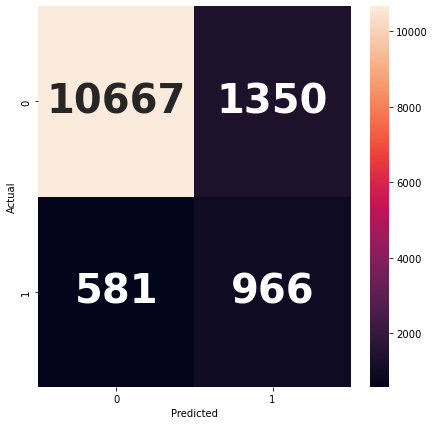

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# XG Boost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.15,0.2,0.5,0.7,1]:  #cross validation for learning rate 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train)
  print("Learning rate : ", lr," Train score : ", roc_auc_score(y_train, model.predict(X_train))," Cross-Val score : ", np.mean(cross_val_score(model,X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.8948409817020041  Cross-Val score :  0.888451916603622
Learning rate :  0.02  Train score :  0.9098896311356375  Cross-Val score :  0.9009047978926146
Learning rate :  0.03  Train score :  0.9243755445832122  Cross-Val score :  0.9124681102145786
Learning rate :  0.04  Train score :  0.929385710136509  Cross-Val score :  0.9167159588198779
Learning rate :  0.05  Train score :  0.9340691257624165  Cross-Val score :  0.9179140906680334
Learning rate :  0.1  Train score :  0.9427098460644786  Cross-Val score :  0.9206008244513864
Learning rate :  0.11  Train score :  0.9439805402265465  Cross-Val score :  0.9214539969124267
Learning rate :  0.12  Train score :  0.9445977345338367  Cross-Val score :  0.9218352341642572
Learning rate :  0.15  Train score :  0.9485550392099913  Cross-Val score :  0.9223435724706371
Learning rate :  0.2  Train score :  0.9524397327911704  Cross-Val score :  0.9242496137237897
Learning rate :  0.5  Train score :  0.97039

In [ ]:
model = xgb.XGBClassifier(learning_rate =0.08, n_estimators=100)  #at lr=0.08 model is more generalized
model.fit(X_train,y_train) #train the model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
xg_auroc=roc_auc_score(y_test,y_pred)  #handles predicted probaility 
print("auroc score for xg boost   :  ",round(xg_auroc,2))  #we get 0.99 very good auroc score

auroc score for xg boost   :   0.78


In [ ]:
from sklearn.metrics import  confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

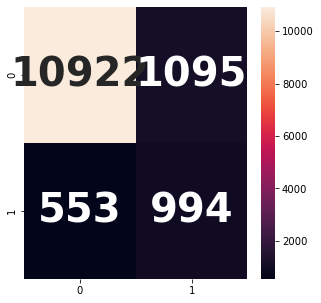

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

In [ ]:
bin_class=pd.DataFrame({"Model":["Logistic regression","KNN","Decision Tree","Random Forest","XGboost"],
                       "auroc":[log_reg_auroc,KNN_auroc,dt_auroc,rf_auroc,xg_auroc]})

In [ ]:
print("Models and their evaluations")
print("\n")
bin_class.sort_values(["auroc"],ascending=False)

Models and their evaluations




,Model,auroc
2,Decision Tree,0.778339
4,XGboost,0.775707
3,Random Forest,0.767906
0,Logistic regression,0.688656
1,KNN,0.658830


# Model Building With Caping Data

In [ ]:
df3 = n_df.copy()

In [ ]:
# Age 
low = df3['age'].quantile(0.25)
high = df3['age'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = high + 1.5 * iqr

df3['age'] = df3['age'].apply(lambda x: percentile_3 if x > percentile_3 else x)
df3['age'] = df3['age'].apply(lambda x: percentile_1 if x < percentile_1 else x)

# Duretion
low = df3['duration'].quantile(0.25)
high = df3['duration'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = high + 1.5 * iqr

df3['duration'] = df3['duration'].apply(lambda x: percentile_3 if x > percentile_3 else x)
df3['duration'] = df3['duration'].apply(lambda x: percentile_1 if x < percentile_1 else x)

# Num Calls
low = df3['num_calls'].quantile(0.25)
high = df3['num_calls'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = high + 1.5 * iqr

df3['num_calls'] = df3['num_calls'].apply(lambda x: percentile_3 if x > percentile_3 else x)
df3['num_calls'] = df3['num_calls'].apply(lambda x: percentile_1 if x < percentile_1 else x)

In [ ]:
X =  df3.drop('y',axis = 1)
y = df3['y']

**Spliting The Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# Balance The Data And Model Building For Caping Data

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='all')
X_train, y_train = smt.fit_resample(X_train, y_train)

# Data Scaling

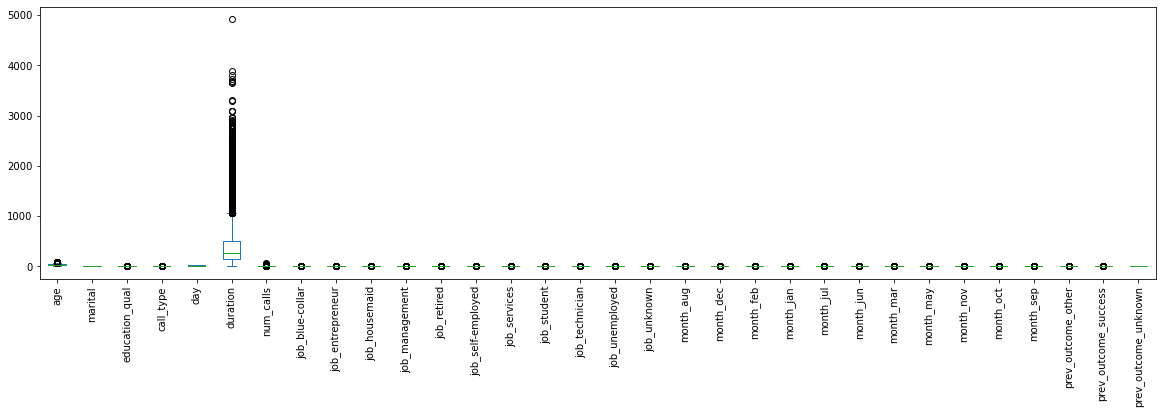

In [ ]:
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)
plt.show()  #lets scale  the datasets

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
log_reg_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for logistic regression  :  ",round(log_reg_auroc,2))

auroc score for logistic regression  :   0.69


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

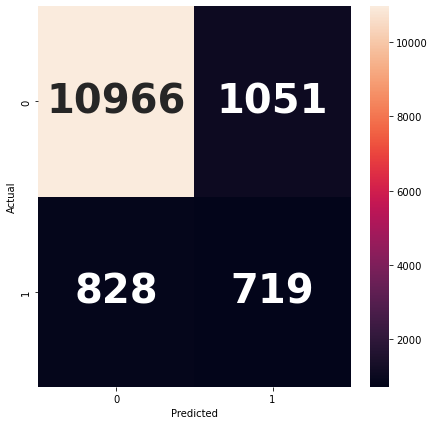

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d') 

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#doing cross validation to identify best value of K 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
for i in [1,2,3,4,5,6,7,8,9,10,20]:  #for each k value finding the auroc 
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  trainAccuracy = roc_auc_score(y_train, knn.predict(X_train))
  print("K value  : " , i,"Train accuracy :",trainAccuracy, " cross val score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  :  1 Train accuracy : 1.0  cross val score :  0.9120511619396687
K value  :  2 Train accuracy : 0.9616976474005228  cross val score :  0.911924466242801
K value  :  3 Train accuracy : 0.9545091489979669  cross val score :  0.9153005025248842
K value  :  4 Train accuracy : 0.9456505954109788  cross val score :  0.9146289863302843
K value  :  5 Train accuracy : 0.9430547487656115  cross val score :  0.9147558962405613
K value  :  6 Train accuracy : 0.9384439442346791  cross val score :  0.913975447584088
K value  :  7 Train accuracy : 0.9368101945977345  cross val score :  0.9138845485956629
K value  :  8 Train accuracy : 0.9339783618936973  cross val score :  0.9135033937336055
K value  :  9 Train accuracy : 0.9329255010165554  cross val score :  0.9138300988426806
K value  :  10 Train accuracy : 0.9313099041533547  cross val score :  0.9121419521735937
K value  :  20 Train accuracy : 0.9219067673540517  cross val score :  0.9094371948035651


In [ ]:
# at k=10 we get good cross val score 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)  #initialized 
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
roc_auc_score(y_test,y_pred)

0.6588298015002341

In [ ]:
from sklearn.metrics import roc_auc_score
KNN_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for KNN  :  ",round(KNN_auroc,2))

auroc score for KNN  :   0.66


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

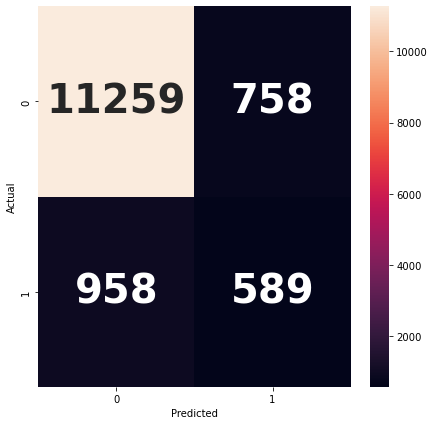

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = roc_auc_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7213186174847518  Cross val score :  0.7213186404026526
Depth  :  2  Training Accuracy :  0.7661741214057508  Cross val score :  0.7587138653287095
Depth  :  3  Training Accuracy :  0.7968341562590764  Cross val score :  0.7970157666341985
Depth  :  4  Training Accuracy :  0.8349549811211152  Cross val score :  0.8319785884140469
Depth  :  5  Training Accuracy :  0.8457377287249492  Cross val score :  0.8419626601640704
Depth  :  6  Training Accuracy :  0.8620389195469066  Cross val score :  0.8560309247704918
Depth  :  7  Training Accuracy :  0.8844575951205343  Cross val score :  0.8749825135946422
Depth  :  8  Training Accuracy :  0.8983444670345628  Cross val score :  0.8866367051314855
Depth  :  9  Training Accuracy :  0.9125943944234679  Cross val score :  0.8973467988541362
Depth  :  10  Training Accuracy :  0.9255736276503049  Cross val score :  0.9046442686444429


In [ ]:
#lets us fit the model with max_depth =5 it seems more of genralised model   in depth>5 we see overfitted model 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=9)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
dt_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for decision tree  :  ",round(dt_auroc,3))

auroc score for decision tree  :   0.778


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

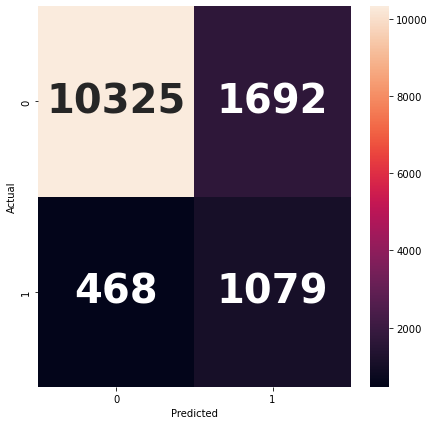

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

In [ ]:
y_pred= rf.predict(X_test)

In [ ]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(X_train, y_train) # the model is trained
  trainAccuracy = roc_auc_score(y_train, rf.predict(X_train)) # this is useless information - i am showing to prove a point
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.8298177461516119  Cross val score :  0.8211049971308585
Depth  :  2  Training Accuracy :  0.8445396456578564  Cross val score :  0.8361719015810005
Depth  :  3  Training Accuracy :  0.8614943363345919  Cross val score :  0.8547966205165298
Depth  :  4  Training Accuracy :  0.870334737147836  Cross val score :  0.8647262886518436
Depth  :  5  Training Accuracy :  0.879628957304676  Cross val score :  0.8759629354118228
Depth  :  6  Training Accuracy :  0.8872168167295963  Cross val score :  0.8822438702997788
Depth  :  7  Training Accuracy :  0.9021928550682544  Cross val score :  0.8919919283069244
Depth  :  8  Training Accuracy :  0.9092724368283474  Cross val score :  0.8991986045677154
Depth  :  9  Training Accuracy :  0.9212895730467614  Cross val score :  0.9049893104213307
Depth  :  10  Training Accuracy :  0.9288048213767064  Cross val score :  0.9100720969831766


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=8,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8)

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
rf_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for random forest classifier   :  ",round(rf_auroc,2))

auroc score for random forest classifier   :   0.77


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

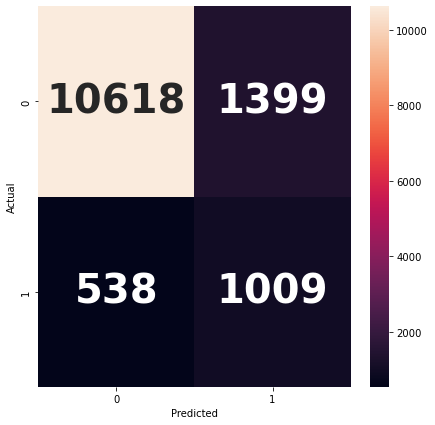

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

In [ ]:
input_cols=df.columns.to_list()[0:10]

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(input_cols, importances)]  #input_cols=column names as list

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: day                  Importance: 0.33
Variable: education_qual       Importance: 0.08
Variable: duration             Importance: 0.06
Variable: age                  Importance: 0.02
Variable: month                Importance: 0.02
Variable: job                  Importance: 0.01
Variable: marital              Importance: 0.01
Variable: call_type            Importance: 0.01
Variable: num_calls            Importance: 0.0
Variable: prev_outcome         Importance: 0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=8,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8)

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
rf_auroc1=roc_auc_score(y_test,y_pred)
print("auroc score for random forest classifier   :  ",round(rf_auroc1,2))

auroc score for random forest classifier   :   0.76


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

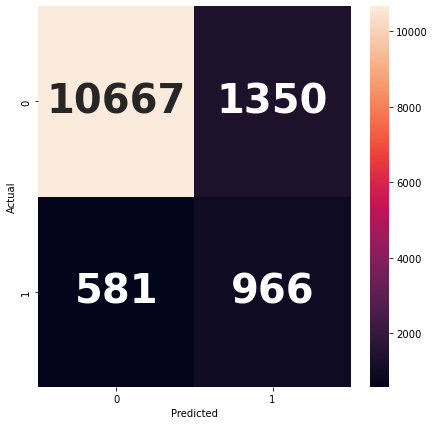

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# XG Boost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.15,0.2,0.5,0.7,1]:  #cross validation for learning rate 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train)
  print("Learning rate : ", lr," Train score : ", roc_auc_score(y_train, model.predict(X_train))," Cross-Val score : ", np.mean(cross_val_score(model,X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.8948409817020041  Cross-Val score :  0.888451916603622
Learning rate :  0.02  Train score :  0.9098896311356375  Cross-Val score :  0.9009047978926146
Learning rate :  0.03  Train score :  0.9243755445832122  Cross-Val score :  0.9124681102145786
Learning rate :  0.04  Train score :  0.929385710136509  Cross-Val score :  0.9167159588198779
Learning rate :  0.05  Train score :  0.9340691257624165  Cross-Val score :  0.9179140906680334
Learning rate :  0.1  Train score :  0.9427098460644786  Cross-Val score :  0.9206008244513864
Learning rate :  0.11  Train score :  0.9439805402265465  Cross-Val score :  0.9214539969124267
Learning rate :  0.12  Train score :  0.9445977345338367  Cross-Val score :  0.9218352341642572
Learning rate :  0.15  Train score :  0.9485550392099913  Cross-Val score :  0.9223435724706371
Learning rate :  0.2  Train score :  0.9524397327911704  Cross-Val score :  0.9242496137237897
Learning rate :  0.5  Train score :  0.97039

In [ ]:
model = xgb.XGBClassifier(learning_rate =0.08, n_estimators=100)  #at lr=0.08 model is more generalized
model.fit(X_train,y_train) #train the model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
xg_auroc=roc_auc_score(y_test,y_pred)  #handles predicted probaility 
print("auroc score for xg boost   :  ",round(xg_auroc,2))  #we get 0.99 very good auroc score

auroc score for xg boost   :   0.78


In [ ]:
from sklearn.metrics import  confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

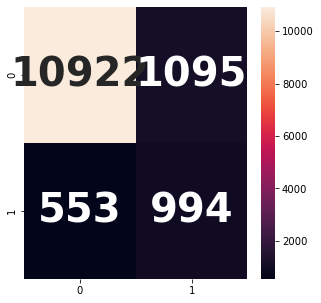

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

In [ ]:
bin_class=pd.DataFrame({"Model":["Logistic regression","KNN","Decision Tree","Random Forest","XGboost"],
                       "auroc":[log_reg_auroc,KNN_auroc,dt_auroc,rf_auroc,xg_auroc]})

In [ ]:
print("Models and their evaluations")
print("\n")
bin_class.sort_values(["auroc"],ascending=False)

Models and their evaluations




,Model,auroc
2,Decision Tree,0.778339
4,XGboost,0.775707
3,Random Forest,0.767906
0,Logistic regression,0.688656
1,KNN,0.658830
